Import all required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import the data to workspace and then preview it

In [3]:
df = pd.read_csv("Train.csv")
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

Checking imported data that have null data or not?

In [4]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Checking the size of the data

In [5]:
df.shape

(10999, 12)

Listing all of the column names

In [6]:
all_column_name = df.columns
print(all_column_name)

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


Printing unique information of 'Mode_of_Shipment'

In [17]:
unique_shipping_method = df['Mode_of_Shipment'].unique()
print(unique_shipping_method)

['Flight' 'Ship' 'Road']


Extracting the data of each 'Mode_of_Shipment' into flight, ship and road data. Then, previewing the data

In [18]:
all_flight_data = df[df['Mode_of_Shipment']=='Flight']
all_ship_data = df[df['Mode_of_Shipment']=='Ship']
all_road_data = df[df['Mode_of_Shipment']=='Road']
print(all_flight_data.head())
print(all_ship_data.head())
print(all_road_data.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

From Research Hypothesis Question, Is different type of shipping method directly effect on the time of arrival?  
Checking by the data in column named "Reached.on.Time_Y.N", it is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

**Checking it by Hypothesis testing**  
Null Hypothesis (H0): The mode of shipment has no effect on the time arrival of the product to the customer  
Alternative Hypothesis (Ha): the mode of shipment affects the time delivery

[Text(0.5, 1.0, 'Count plot of number of product reach on time or not')]

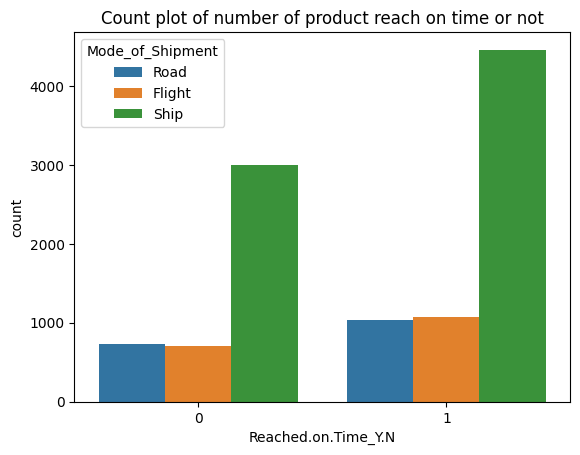

In [23]:
sns.countplot(x=df['Reached.on.Time_Y.N'], hue=df['Mode_of_Shipment']).set(title='Count plot of number of product reach on time or not')

Checking the mean, median, mode and standard deviation of each mode of shipping data

In [19]:
print(all_flight_data['Reached.on.Time_Y.N'].describe())
print(all_ship_data['Reached.on.Time_Y.N'].describe())
print(all_road_data['Reached.on.Time_Y.N'].describe())

count    1777.000000
mean        0.601576
std         0.489711
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64
count    7462.000000
mean        0.597561
std         0.490422
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64
count    1760.000000
mean        0.588068
std         0.492323
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64


Using t-test to compare that there is no significantly difference in population mean between each of mode of shipment.

In [9]:
# Hypothesis Testing
from scipy import stats

alpha = 0.05
def print_hypothesis_result(test_name, p_value, alpha):
    print(f"\n{test_name}:")
    print(f"Null Hypothesis: {null_hypothesis}")
    print(f"Alternative Hypothesis: {alternative_hypothesis}")
    print(f"P-Value: {p_value:.4f}")
    
    if p_value < alpha/2 or p_value>1-alpha/2:
        print("Result: Reject Null Hypothesis")
    else:
        print("Result: Retain Null Hypothesis")

# Test 1: T-test to compare the average age between Pink Cab and Yellow Cab customers
null_hypothesis = "There is no significant difference in the average between 2 types of shipping method."
alternative_hypothesis = "There is a significant difference in the average between 2 types of shipping method."

flight_reached_on_time = all_flight_data['Reached.on.Time_Y.N']
ship_reached_on_time = all_ship_data['Reached.on.Time_Y.N']
road_reached_on_time = all_road_data['Reached.on.Time_Y.N']

t_stat_fs, p_value_fs = stats.ttest_ind(flight_reached_on_time, ship_reached_on_time)
t_stat_fr, p_value_fr = stats.ttest_ind(flight_reached_on_time, road_reached_on_time)
t_stat_sr, p_value_sr = stats.ttest_ind(ship_reached_on_time, road_reached_on_time)

print_hypothesis_result("T-test for on time", p_value_fs, alpha)
print_hypothesis_result("T-test for on time", p_value_fr, alpha)
print_hypothesis_result("T-test for on time", p_value_sr, alpha)


T-test for on time:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.7564
Result: Retain Null Hypothesis

T-test for on time:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.4134
Result: Retain Null Hypothesis

T-test for on time:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.4655
Result: Retain Null Hypothesis


Testing by ANOVA to calculate the p-value in order to retain or reject the null hypothesis

In [10]:
# Add your code here
anova_p_value = stats.f_oneway(all_flight_data['Reached.on.Time_Y.N'],all_ship_data['Reached.on.Time_Y.N'],all_road_data['Reached.on.Time_Y.N'], axis=0)[1]
print(f"p-value is: {anova_p_value}")
print_hypothesis_result("ANOVA method", anova_p_value, alpha)
    

p-value is: 0.6896100162003029

ANOVA method:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.6896
Result: Retain Null Hypothesis


<Axes: xlabel='Customer_care_calls', ylabel='count'>

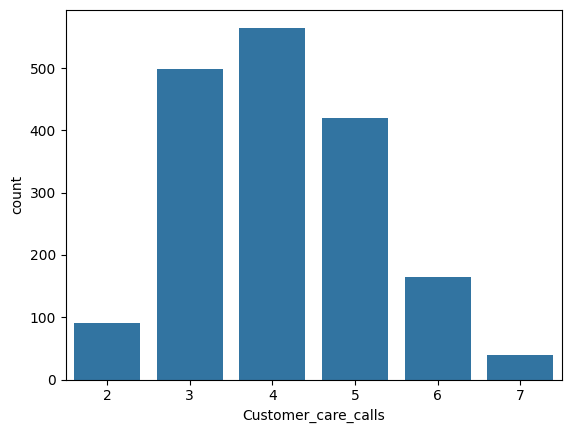

In [11]:
# all_flight_data.Customer_care_calls.plot(kind='hist')
sns.countplot(x=all_flight_data.Customer_care_calls)

<Axes: xlabel='Customer_care_calls', ylabel='count'>

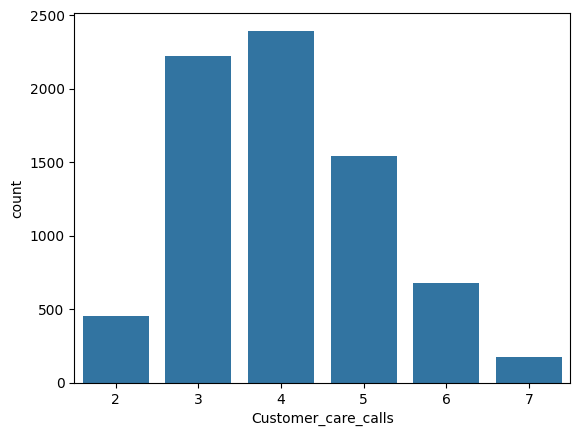

In [12]:
# all_ship_data.Customer_care_calls.plot(kind='hist')
sns.countplot(x=all_ship_data.Customer_care_calls)

<Axes: xlabel='Customer_care_calls', ylabel='count'>

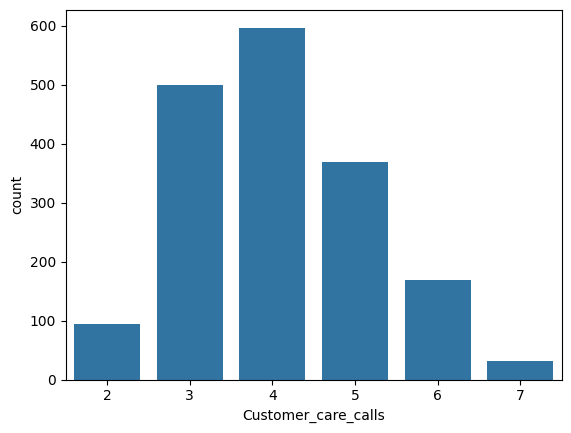

In [13]:
# all_road_data.Customer_care_calls.plot(kind='hist')
sns.countplot(x=all_road_data.Customer_care_calls)

<Axes: xlabel='Customer_care_calls', ylabel='count'>

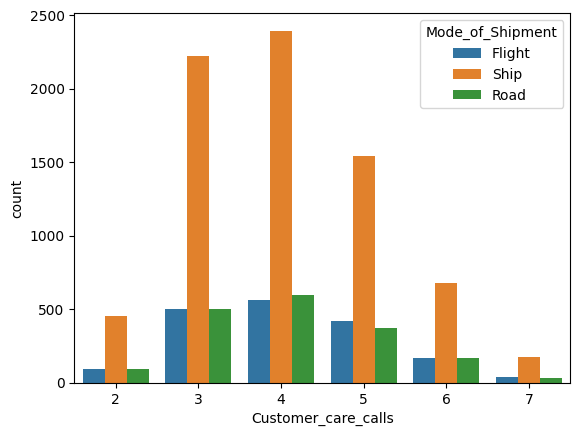

In [14]:
sns.countplot(x=df['Customer_care_calls'], hue=df['Mode_of_Shipment'])

In [15]:
fig, ax =plt.subplots(1,2)
sns.countplot(x=df[df['Reached.on.Time_Y.N']==1]['Customer_care_calls'], hue=df['Mode_of_Shipment'], ax=ax[0]).set(title='not on time')
sns.countplot(x=df[df['Reached.on.Time_Y.N']==0]['Customer_care_calls'], hue=df['Mode_of_Shipment'], ax=ax[1]).set(title='on time')
fig.show()

/var/folders/5q/2ybmyhzn39q6hk6zq2j6s0z40000gn/T/ipykernel_9420/2970336555.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='Customer_rating', ylabel='count'>

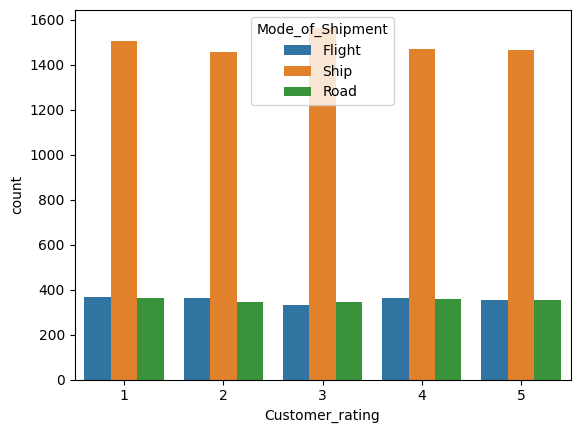

In [16]:
sns.countplot(x=df['Customer_rating'], hue=df['Mode_of_Shipment'])